In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
def show_state(env, episode,step, info=""):
    plt.figure(99999,figsize=[8,6])
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("episode: {} step: {} ".format(episode,step))
    #plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [5]:
import gym

In [6]:
import time

In [7]:
#from gym.envs.registration import register
#register(
#    id='FrozenLakeNotSlippery-v0',
#    entry_point='gym.envs.toy_text:FrozenLakeEnv',
#    kwargs={'map_name' : '4x4', 'is_slippery': False},
#    max_episode_steps=100,
#    reward_threshold=0.78, # optimum = .8196
#)

In [8]:
#env = gym.make('FrozenLakeNotSlippery-v0')
env = gym.make('FrozenLake-v0')

In [9]:
number_of_states=env.observation_space.n
number_of_actions=env.action_space.n

In [10]:
Q=torch.zeros([number_of_states,number_of_actions])

In [11]:
gamma=0.95

In [12]:
learning_rate=0.9

In [13]:
%%time
#env = gym.make('FrozenLake-v0')

num_episodes=1000

steps_total=np.full([num_episodes],-999,dtype=np.int32)
rewards_total=np.full([num_episodes],-999,dtype=np.float32)
for i_episode in range(num_episodes):
    
    state = env.reset()
    #for step in range(100):
    step=0
    #print("____INITIAL STATE____")
    #env.render()
    #print("^^^^^^^^^^^^^^^^^^^^^")
    while True:
        
        step+=1
        
        #action=env.action_space.sample()
        Q_eps=0.001*torch.randn([number_of_actions])
        action=torch.argmax(Q[state]+Q_eps).item()
        new_state, reward, done, info = env.step(action)
        
        Q[state,action]=(1.0-learning_rate)*Q[state,action]+learning_rate*(reward+gamma *torch.max(Q[new_state]).item())
        
        state=new_state
        
        #time.sleep(0.4)
        #print("------------------------")
        #env.render() 
        #print("++++++++++++++++++++++++")
        #print('new state: ',new_state)
        #print('info: ', info)
        
        #show_state(env.env,i_episode,step)
        
        if done:
            steps_total[i_episode]=step
            rewards_total[i_episode]=reward
            print("Episode finished after: {}".format(step))
            break
        

Episode finished after: 2
Episode finished after: 7
Episode finished after: 11
Episode finished after: 5
Episode finished after: 10
Episode finished after: 4
Episode finished after: 8
Episode finished after: 7
Episode finished after: 6
Episode finished after: 17
Episode finished after: 10
Episode finished after: 6
Episode finished after: 6
Episode finished after: 20
Episode finished after: 2
Episode finished after: 6
Episode finished after: 3
Episode finished after: 4
Episode finished after: 5
Episode finished after: 6
Episode finished after: 7
Episode finished after: 3
Episode finished after: 6
Episode finished after: 3
Episode finished after: 7
Episode finished after: 5
Episode finished after: 9
Episode finished after: 9
Episode finished after: 3
Episode finished after: 39
Episode finished after: 27
Episode finished after: 12
Episode finished after: 6
Episode finished after: 9
Episode finished after: 7
Episode finished after: 3
Episode finished after: 4
Episode finished after: 4
Epis

Episode finished after: 35
Episode finished after: 8
Episode finished after: 60
Episode finished after: 29
Episode finished after: 33
Episode finished after: 32
Episode finished after: 30
Episode finished after: 11
Episode finished after: 16
Episode finished after: 57
Episode finished after: 44
Episode finished after: 48
Episode finished after: 75
Episode finished after: 81
Episode finished after: 64
Episode finished after: 88
Episode finished after: 12
Episode finished after: 59
Episode finished after: 43
Episode finished after: 15
Episode finished after: 47
Episode finished after: 17
Episode finished after: 21
Episode finished after: 26
Episode finished after: 10
Episode finished after: 59
Episode finished after: 41
Episode finished after: 33
Episode finished after: 42
Episode finished after: 37
Episode finished after: 30
Episode finished after: 11
Episode finished after: 36
Episode finished after: 11
Episode finished after: 48
Episode finished after: 60
Episode finished after: 28
Ep

Episode finished after: 25
Episode finished after: 62
Episode finished after: 18
Episode finished after: 67
Episode finished after: 14
Episode finished after: 17
Episode finished after: 10
Episode finished after: 33
Episode finished after: 39
Episode finished after: 19
Episode finished after: 20
Episode finished after: 20
Episode finished after: 26
Episode finished after: 45
Episode finished after: 39
Episode finished after: 34
Episode finished after: 72
Episode finished after: 21
Episode finished after: 19
Episode finished after: 17
Episode finished after: 34
Episode finished after: 17
Episode finished after: 41
Episode finished after: 10
Episode finished after: 100
Episode finished after: 16
Episode finished after: 20
Episode finished after: 49
Episode finished after: 32
Episode finished after: 6
Episode finished after: 17
Episode finished after: 68
Episode finished after: 26
Episode finished after: 24
Episode finished after: 15
Episode finished after: 14
Episode finished after: 52
E

In [14]:
print("Average number of steps: {}". format(np.average(steps_total)))

Average number of steps: 31.126


In [15]:
print("Average number of steps in last 100 episodes: {}". format(np.average(steps_total[-100:])))

Average number of steps in last 100 episodes: 36.63


In [16]:
print("Fraction of episodes finished succesfully {}".format(np.average(rewards_total)))

Fraction of episodes finished succesfully 0.5320000052452087


In [17]:
print("Fraction of episodes finished succesfully in last 100 episodes {}".format(np.average(rewards_total[-100:])))

Fraction of episodes finished succesfully in last 100 episodes 0.5699999928474426


In [18]:
print(Q)

tensor([[1.5956e-01, 5.2632e-03, 1.0814e-03, 1.1001e-03],
        [1.7167e-05, 7.8643e-05, 9.6223e-06, 3.8731e-03],
        [4.3927e-03, 4.8703e-04, 3.6262e-04, 3.8813e-03],
        [7.6877e-04, 4.0654e-03, 8.8429e-06, 3.1069e-03],
        [2.7525e-01, 1.1357e-06, 4.9391e-05, 4.0889e-04],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.4666e-05, 8.3826e-09, 9.5588e-05, 2.1847e-08],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.2054e-04, 5.6246e-04, 6.8178e-04, 5.0592e-01],
        [5.8611e-06, 7.6204e-01, 0.0000e+00, 1.3308e-04],
        [7.9570e-02, 8.5577e-04, 2.8696e-05, 8.3145e-07],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [6.5486e-05, 7.7839e-05, 5.3023e-01, 8.4662e-04],
        [0.0000e+00, 9.9599e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [19]:
#print(rewards_total)

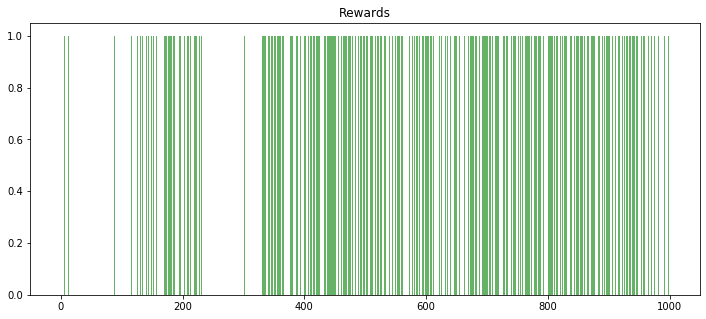

In [20]:
plt.figure(1,figsize=[12,5])
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.show()

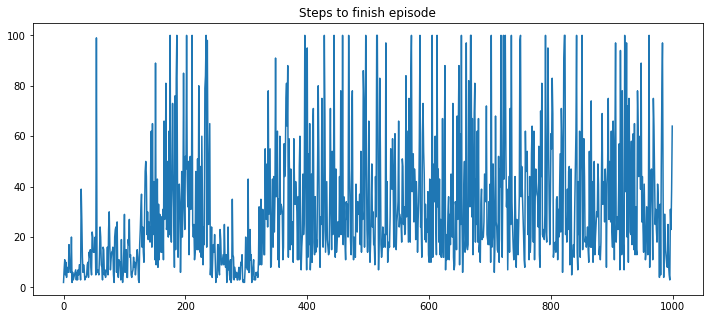

In [21]:
plt.figure(2,figsize=[12,5])
plt.title("Steps to finish episode")
plt.plot(steps_total)
plt.show()

In [22]:
env.env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

In [23]:
env.env.P[8]

{0: [(0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 12, 0.0, True)],
 1: [(0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 12, 0.0, True),
  (0.3333333333333333, 9, 0.0, False)],
 2: [(0.3333333333333333, 12, 0.0, True),
  (0.3333333333333333, 9, 0.0, False),
  (0.3333333333333333, 4, 0.0, False)],
 3: [(0.3333333333333333, 9, 0.0, False),
  (0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 8, 0.0, False)]}

In [24]:
env.env.P[8][1]

[(0.3333333333333333, 8, 0.0, False),
 (0.3333333333333333, 12, 0.0, True),
 (0.3333333333333333, 9, 0.0, False)]